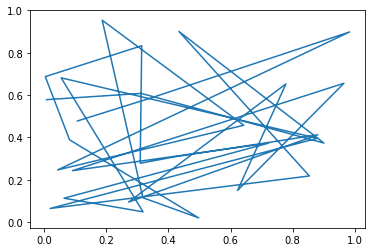

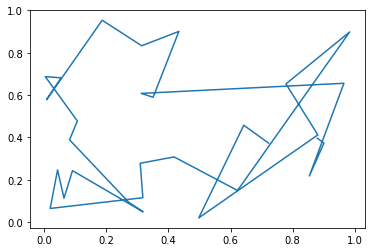

In [17]:
#aco
"""1.アリとフェロモンの初期化
　　2. 終了条件を満たすまで以下の処理を繰り返す
  　　　1.各アリに対してフェロモンとヒューリスティックな情報に基づいて確率的な解の
     　　選択を行う
       2.各アリが分泌するフェロモンを計算
       3.フェロモン情報の更新
    3.最も良いアリを出力"""

#アリをk,繰り返し数をtとする　kが訪問していない都市の集合Ω
#Ωに属する都市に対して評価値
#pathは巡回路
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
class TSP:
    def __init__(self,path=None,alpha=1.0,beta=1.0,Q=1.0,vanish_rate=0.95):
        self.alpha=alpha
        self.beta=beta
        self.Q=Q
        self.vanish_rate=vanish_rate
        
        #回路を読み込む
        if path is not None:
            self.set_loc(np.array(pd.read_csv(path)))
    #回路の座標を決定       
    def set_loc(self,location):
        self.loc=location
        self.n_data=len(self.loc)
        #距離の表を作成
        self.dist=squareform(pdist(self.loc))
        #更新する量は常にweight 今回はこれがフェロモン
        self.weight=np.random.random_sample((self.n_data,self.n_data))
        #最も良かった結果を出力
        self.result=np.arange(self.n_data)
        
    def cost(self,order):
        """指定された順序のコスト計算関数"""
        n_order=len(order)
        cost_list=[self.dist[order[i],order[(i+1)%n_order]] for i in np.arange(n_order)]
        return np.sum(cost_list)
    
    def plot(self,order=None):
        """指定された順序でプロット"""
        if order is None:
            plt.plot(self.loc[:,0],self.loc[:,1])
        else:
            plt.plot(self.loc[order,0],self.loc[order,1])
            
        plt.show()
            
    def solve(self,n_ant=100):
        """ありコロニー最適化"""
        #巡回経路
        order=np.zeros(self.n_data,np.int)
        #フェロモン変化量
        delta=np.zeros((self.n_data,self.n_data))
        
        #各アリについて計算を行っていく
        for i in range(n_ant):
            #都市の集合0,1,2,3...
            city=np.arange(self.n_data)
            #現在いる都市
            now_city=np.random.randint(self.n_data)
            #訪問していない都市の集合
            city=city[city!=now_city]
            order[0]=now_city
            
            for j in range(1,self.n_data):
                evaluation=self.weight[now_city,city]**self.alpha*self.dist[now_city,city]**(-1*self.beta)
                evaluation=evaluation/np.sum(evaluation)
                
                #確率
                prob=evaluation/np.sum(evaluation)
                #都市mをランダムに選択する
                index=self.random_index(prob)
                
                #状態の更新
                now_city=city[index]
                city=city[city!=now_city]
                order[j]=now_city
                
             #経路超lk
            l=self.cost(order)
            
            #フェロモン変化量
            c=self.Q/l
            for i in range(self.n_data-1):
                delta[order[i],order[i+1]]=c
                delta[order[i+1],order[i]]=c
                
            #フェロモン更新
            self.weight=self.vanish_rate*self.weight+delta
            
            #今までで最も良ければ結果更新
            if self.cost(self.result)>l:
                self.result=order.copy()
                
            
            
        return self.result
    
    #ランダムなインデックスを生成する関数
    #neuman 棄却
    def random_index(self,prob):
        n_prob=len(prob)
        
        while True:
            y=np.random.random()
            index=np.random.randint(n_prob)
            
            if y<prob[index]:
                return index
            
if __name__=='__main__':
    tsp=TSP()
    tsp.set_loc(np.random.random_sample((30,2)))
    tsp.plot()
    tsp.solve(n_ant=1000)
    tsp.plot(tsp.result)
        
        
        